
## Таблица 1. Родословная - predige.csv

| Колонка	  | Описание      |
| ---------- | ------------- |
| animal_id  | ID животного  |
| mother_id  | ID матери     |
| father_id  | ID отца       |

## Таблица 2. Контрольные дойки - train.csv

| Колонка	       | Описание                                                             | Таргет |
| ---------------- | -------------------------------------------------------------------- | ------ | 
| animal_id        | ID животного                                                         |        |
| lactation        | Номер лактации                                                       |        |
| calving_date     | Дата начала лактации                                                 |        |
| farm             | Ферма                                                                |        |
| farmgroup	       | Хозяйство (группа из ферм)                                           |        |
| birth_date       | Дата рождения животного                                              |        |
| milk_yield_1     | Контрольная дойка (удой за 1 день) в 1 месяце после начала лактации  |        |
| milk_yield_2     | Контрольная дойка (удой за 1 день) в 2 месяце после начала лактации  |        |
| milk_yield_3     | Контрольная дойка (удой за 1 день) в 3 месяце после начала лактации  | X      |
| milk_yield_4     | Контрольная дойка (удой за 1 день) в 4 месяце после начала лактации  | X      |
| milk_yield_5     | Контрольная дойка (удой за 1 день) в 5 месяце после начала лактации  | X      |
| milk_yield_6     | Контрольная дойка (удой за 1 день) в 6 месяце после начала лактации  | X      |
| milk_yield_7     | Контрольная дойка (удой за 1 день) в 7 месяце после начала лактации  | X      |
| milk_yield_8     | Контрольная дойка (удой за 1 день) в 8 месяце после начала лактации  | X      |
| milk_yield_9     | Контрольная дойка (удой за 1 день) в 9 месяце после начала лактации  | X      |
| milk_yield_10    | Контрольная дойка (удой за 1 день) в 10 месяце после начала лактации | X      |

## Таблица 3. Тестовый датаест - X_test_public.csv

| Колонка	       | Описание                                                             | Таргет |
| ---------------- | -------------------------------------------------------------------- | ------ | 
| animal_id        | ID животного                                                         |        |
| lactation        | Номер лактации                                                       |        |
| calving_date     | Дата начала лактации                                                 |        |
| farm             | Ферма                                                                |        |
| farmgroup	       | Хозяйство (группа из ферм)                                           |        |
| birth_date       | Дата рождения животного                                              |        |
| milk_yield_1     | Контрольная дойка (удой за 1 день) в 1 месяце после начала лактации  |        |
| milk_yield_2     | Контрольная дойка (удой за 1 день) в 2 месяце после начала лактации  |        |

## Таблица 4. Формат датафрейма прогноза, который должен быть возвращен функцией predict() 

| Колонка	       | Описание                                                             | Таргет |
| ---------------- | -------------------------------------------------------------------- | ------ | 
| animal_id        | ID животного                                                         |        |
| lactation        | Номер лактации                                                       |        |
| milk_yield_3     | Контрольная дойка (удой за 1 день) в 3 месяце после начала лактации  | X      |
| milk_yield_4     | Контрольная дойка (удой за 1 день) в 4 месяце после начала лактации  | X      |
| milk_yield_5     | Контрольная дойка (удой за 1 день) в 5 месяце после начала лактации  | X      |
| milk_yield_6     | Контрольная дойка (удой за 1 день) в 6 месяце после начала лактации  | X      |
| milk_yield_7     | Контрольная дойка (удой за 1 день) в 7 месяце после начала лактации  | X      |
| milk_yield_8     | Контрольная дойка (удой за 1 день) в 8 месяце после начала лактации  | X      |
| milk_yield_9     | Контрольная дойка (удой за 1 день) в 9 месяце после начала лактации  | X      |
| milk_yield_10    | Контрольная дойка (удой за 1 день) в 10 месяце после начала лактации | X      |

In [1]:
import pandas as pd # для анализа и предобработки данных
import numpy as np # для матричных вычислений
import matplotlib.pyplot as plt # для визуализации
import seaborn as sns # для визуализации
from sklearn.ensemble import IsolationForest # Изоляционный лес - алгоритм для выявления аномалий
import warnings # Предупреждения для игнорирования ненужных предупреждений
warnings.filterwarnings('ignore') # Фильтрация предупреждений
from sklearn.preprocessing import LabelEncoder # Кодировщик меток - для преобразования категориальных признаков в числовые
from sklearn import linear_model # Линейные модели
from sklearn import tree # Деревья решений
from sklearn import ensemble # Ансамблевые методы
from sklearn import metrics # Метрики для оценки качества моделей
from sklearn import preprocessing # Препроцессинг данных (нормализация, стандартизация и т.д.)
from sklearn.model_selection import train_test_split # Разделение данных на обучающую и тестовую выборки
from sklearn.feature_selection import SelectKBest, f_classif # Выбор признаков с использованием статистических методов
from sklearn.preprocessing import MinMaxScaler # Масштабирование данных
from sklearn.linear_model import LogisticRegression # Логистическая регрессия - метод для бинарной классификации
from sklearn.metrics import accuracy_score # Оценка точности модели
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier # Классификатор на основе дерева решений
from sklearn.ensemble import RandomForestClassifier # Классификатор на основе случайного леса
from sklearn.metrics import accuracy_score, recall_score # Оценка точности и полноты модели
from sklearn.ensemble import GradientBoostingClassifier # Градиентный бустинг - ансамблевый метод
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier # Стекинг классификаторов - ансамблевый метод для объединения нескольких моделей
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score # Оценка точности модели
import optuna # Optuna - библиотека для автоматической оптимизации гиперпараметров


# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
# # Подгрузим наши данные из соревнования
# DATA_DIR = '/kaggle/input/korova/'
# df = pd.read_csv(DATA_DIR+'/28.06.24_data.csv') # датасет для обучения

df = pd.read_csv('data/combined_data.csv')
df.head()

,animal_id,lactation,calving_date,farm,farmgroup,birth_date,milk_yield_1,milk_yield_2,milk_yield_3,milk_yield_4,milk_yield_5,milk_yield_6,milk_yield_7,milk_yield_8,milk_yield_9,milk_yield_10,mother_id,father_id,Unnamed: 0
0,ID_0000732131,1,2018-11-11,2104,4463,2016-10-02,19.2,21.4,NaN,30.7,28.6,28.1,NaN,31.1,25.5,26.1,ID_0000741349,ID_0000747757,NaN
1,ID_0000732194,1,2013-05-01,2104,4463,2011-05-19,16.7,15.9,14.4,20.4,14.3,23.2,21.0,22.0,23.3,22.5,ID_0000742916,ID_0000743194,NaN
2,ID_0000732195,1,2013-05-17,2104,4463,2011-06-01,15.8,14.4,19.3,23.1,31.8,24.7,30.9,32.3,32.7,33.1,ID_0000740204,ID_0000742534,NaN
3,ID_0000732195,2,2014-06-16,2104,4463,2011-06-01,43.7,39.9,39.2,33.2,40.3,44.8,39.3,40.1,40.5,37.7,ID_0000740204,ID_0000742534,NaN
4,ID_0000732338,1,2013-05-18,2104,4463,2011-07-11,13.8,13.2,29.9,26.4,31.3,17.6,25.8,25.6,24.5,19.8,ID_0000743339,ID_0000743366,NaN


Удалил безполезный признак

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# Проверка на наличие дубликатов
duplicates = df.duplicated()
num_duplicates = duplicates.sum()

print(f"Количество дубликатов: {num_duplicates}")



Количество дубликатов: 0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155575 entries, 0 to 155574
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   animal_id      155575 non-null  object 
 1   lactation      155575 non-null  int64  
 2   calving_date   155575 non-null  object 
 3   farm           155575 non-null  int64  
 4   farmgroup      155575 non-null  int64  
 5   birth_date     155575 non-null  object 
 6   milk_yield_1   155575 non-null  float64
 7   milk_yield_2   155575 non-null  float64
 8   milk_yield_3   151068 non-null  float64
 9   milk_yield_4   151634 non-null  float64
 10  milk_yield_5   151457 non-null  float64
 11  milk_yield_6   150373 non-null  float64
 12  milk_yield_7   150938 non-null  float64
 13  milk_yield_8   151065 non-null  float64
 14  milk_yield_9   147880 non-null  float64
 15  milk_yield_10  126179 non-null  float64
 16  mother_id      153811 non-null  object 
 17  father_id      155277 non-nul

In [6]:
# Количество пропусков в каждом столбце
missing_counts = df.isnull().sum()
print("Количество пропусков в каждом столбце:")
missing_counts

Количество пропусков в каждом столбце:


animal_id            0
lactation            0
calving_date         0
farm                 0
farmgroup            0
birth_date           0
milk_yield_1         0
milk_yield_2         0
milk_yield_3      4507
milk_yield_4      3941
milk_yield_5      4118
milk_yield_6      5202
milk_yield_7      4637
milk_yield_8      4510
milk_yield_9      7695
milk_yield_10    29396
mother_id         1764
father_id          298
dtype: int64

### Знакомлюсь с признаком lactation

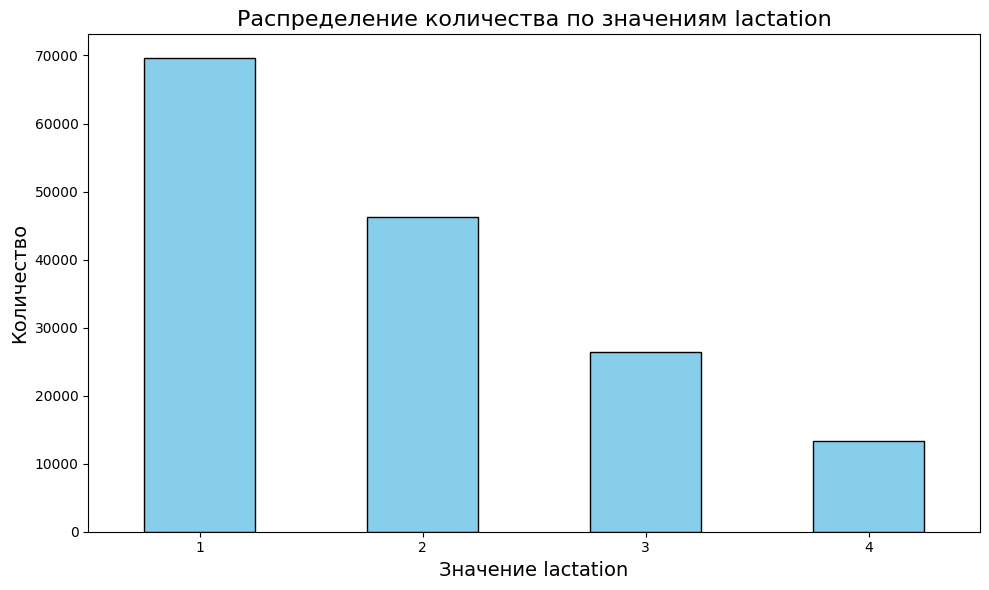

In [7]:
# Группировка данных по lactation для подсчета количества (count) в каждой категории
grouped_lactation = df['lactation'].value_counts().sort_index()

# Создание графика распределения
fig, ax = plt.subplots(figsize=(10, 6))

# График количества для каждого значения lactation
grouped_lactation.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
ax.set_title('Распределение количества по значениям lactation', fontsize=16)
ax.set_xlabel('Значение lactation', fontsize=14)
ax.set_ylabel('Количество', fontsize=14)
ax.tick_params(axis='x', rotation=0)

# Показать график
plt.tight_layout()
plt.show()


Вывод: Понял. Всего 4 лактации у коров и у всех коров есть первая лактация но с каждой последующей лактацией, коровы ражали реже 

### Знакомлюсь с признаком farmgroup

In [8]:
df['farmgroup'].describe()     

count    155575.000000
mean       5211.374527
std        1116.032606
min        3482.000000
25%        3720.000000
50%        5719.000000
75%        6141.000000
max        6474.000000
Name: farmgroup, dtype: float64

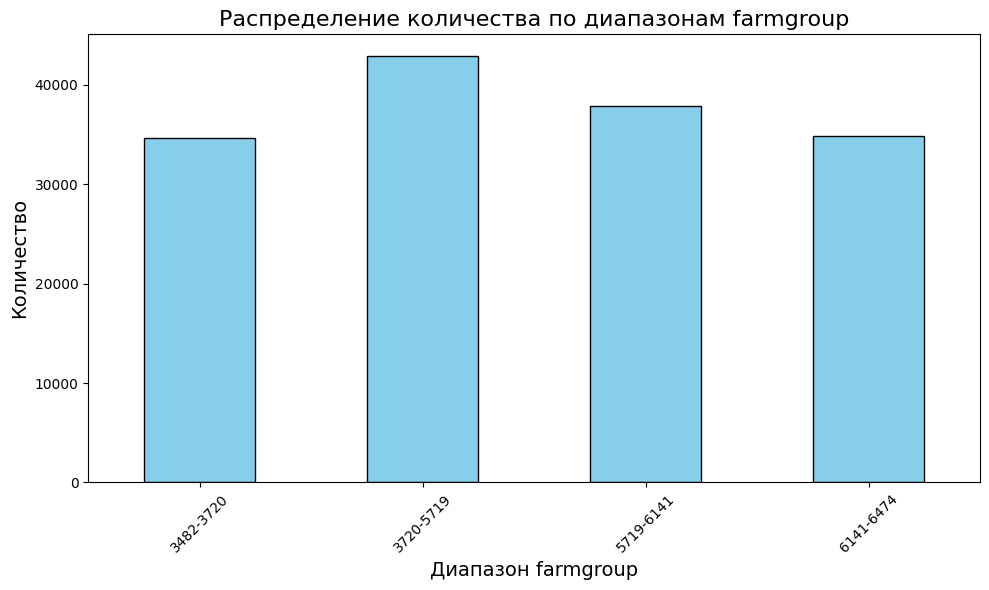

In [9]:
# Разделение farmgroup на диапазоны
farmgroup_bins = pd.cut(df['farmgroup'], bins=[3482, 3720, 5719, 6141, 6474], 
                        labels=['3482-3720', '3720-5719', '5719-6141', '6141-6474'])

# Группировка данных по farmgroup_bins для подсчета количества (count) в каждой категории
grouped_farmgroup = df['farmgroup'].groupby(farmgroup_bins).size()

# Создание графика распределения
fig, ax = plt.subplots(figsize=(10, 6))

# График количества людей для каждой группы диапазонов farmgroup
grouped_farmgroup.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
ax.set_title('Распределение количества по диапазонам farmgroup', fontsize=16)
ax.set_xlabel('Диапазон farmgroup', fontsize=14)
ax.set_ylabel('Количество', fontsize=14)
ax.tick_params(axis='x', rotation=45)

# Показать график
plt.tight_layout()
plt.show()


Вывод: Распределив признак farmgroup на группы, увидел, что в целом у хозяйств близкое значение по количетсву животных

### Знакомлюсь с признаком farm

In [10]:
df['farm'].describe()

count    155575.000000
mean       2380.182484
std         426.180448
min        1686.000000
25%        1812.000000
50%        2576.000000
75%        2732.000000
max        2846.000000
Name: farm, dtype: float64

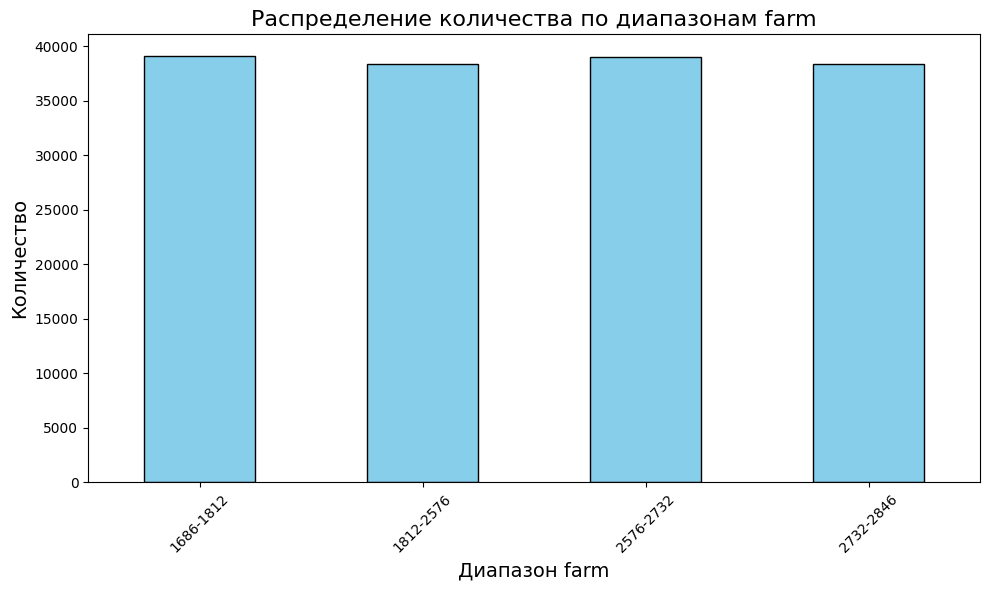

In [11]:
# Разделение farm на диапазоны
farm_bins = pd.cut(df['farm'], bins=[1686, 1812, 2576, 2732, 2846], 
                   labels=['1686-1812', '1812-2576', '2576-2732', '2732-2846'])

# Группировка данных по farm_bins для подсчета количества (count) в каждой категории
grouped_farm = df['farm'].groupby(farm_bins).size()

# Создание графика распределения
fig, ax = plt.subplots(figsize=(10, 6))

# График количества людей для каждой группы диапазонов farm
grouped_farm.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
ax.set_title('Распределение количества по диапазонам farm', fontsize=16)
ax.set_xlabel('Диапазон farm', fontsize=14)
ax.set_ylabel('Количество', fontsize=14)
ax.tick_params(axis='x', rotation=45)

# Показать график
plt.tight_layout()
plt.show()


Вывод: Распределив признак farm на группы, увидел, что в целом у ферм близкое значение по количетсву животных

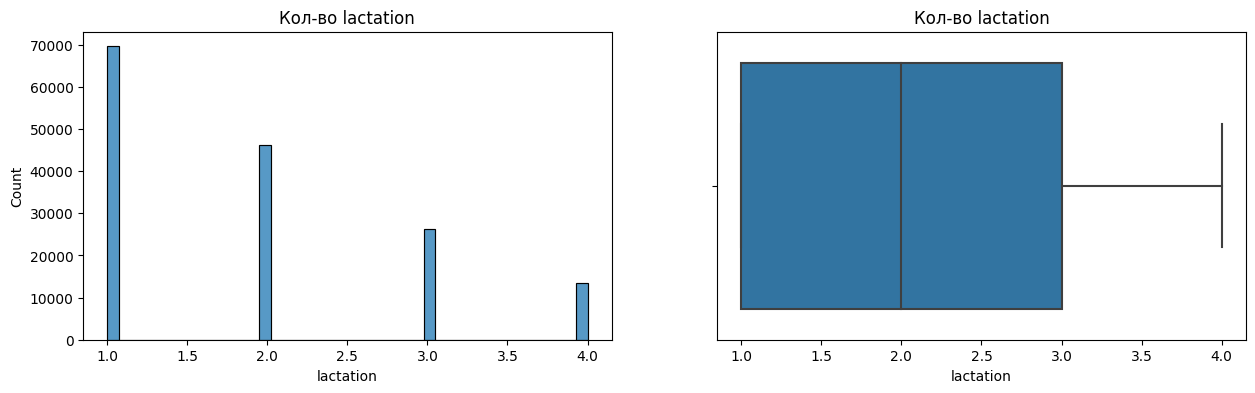

In [12]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='lactation', ax=axes[0]);
histplot.set_title('Кол-во lactation');
boxplot = sns.boxplot(data=df, x='lactation', ax=axes[1]);
boxplot.set_title('Кол-во lactation');

Вывод: Лактация распределилась равноверно и закономерно, выбросов не имеем. 

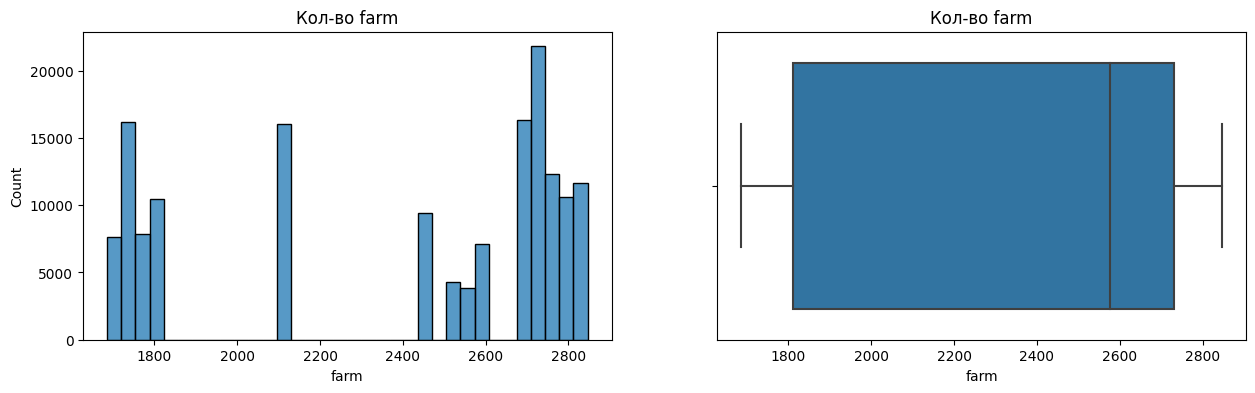

In [13]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='farm', ax=axes[0]);
histplot.set_title('Кол-во farm');
boxplot = sns.boxplot(data=df, x='farm', ax=axes[1]);
boxplot.set_title('Кол-во farm');

Вывод: Фермы распределились довольно интересным образом, имя фермы с большем цифровым значением имеет больше животных, эта также видно как смещена центральная линия в коробчатой диограмме. 

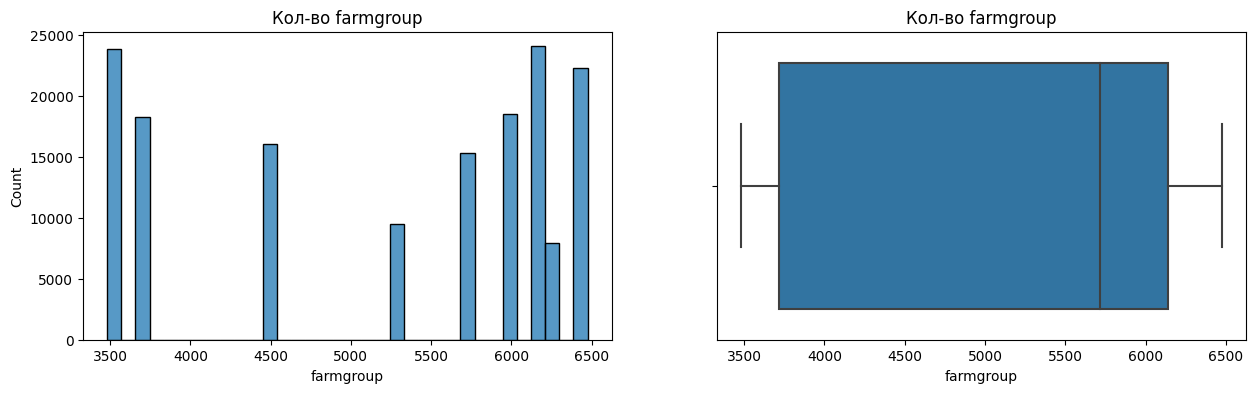

In [14]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='farmgroup', ax=axes[0]);
histplot.set_title('Кол-во farmgroup');
boxplot = sns.boxplot(data=df, x='farmgroup', ax=axes[1]);
boxplot.set_title('Кол-во farmgroup');

Вывод: Хозяйства также имеют большое количество животных с большим количеством цифр в наименование. Это видно на коробчатой диограмме 

## Обработка выбросов 

In [15]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    
    mu = x.mean()
    sigma = x.std()
    
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    
    # Фильтрация данных внутри основного датафрейма df
    data = data[(x >= lower_bound) & (x <= upper_bound)]
    
    return data

---

### Признак  milk_yield_1

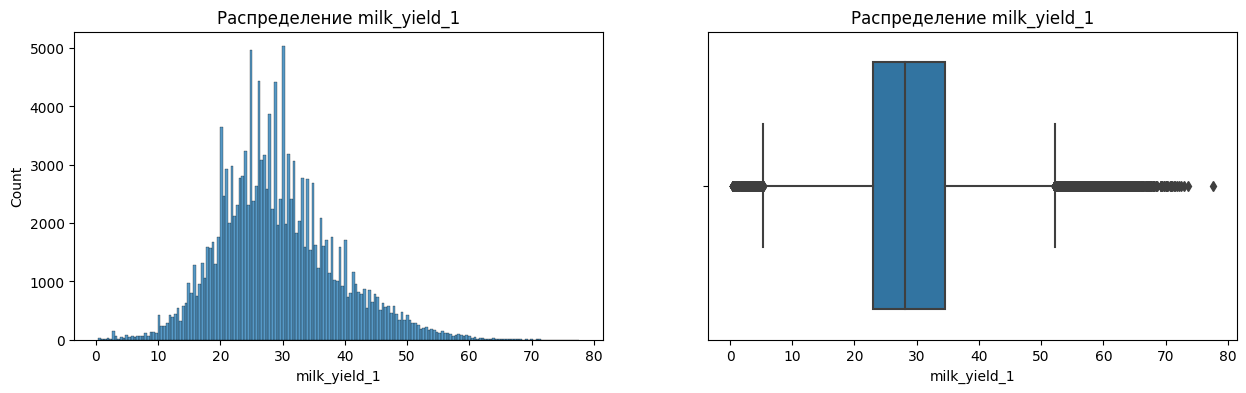

In [16]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_1', ax=axes[0]);
histplot.set_title('Распределение milk_yield_1');
boxplot = sns.boxplot(data=df, x='milk_yield_1', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_1');

In [17]:
# Вызываем функцию для очистки признака 'milk_yield_1' от выбросов в df
df = outliers_z_score(df, 'milk_yield_1', log_scale=True)

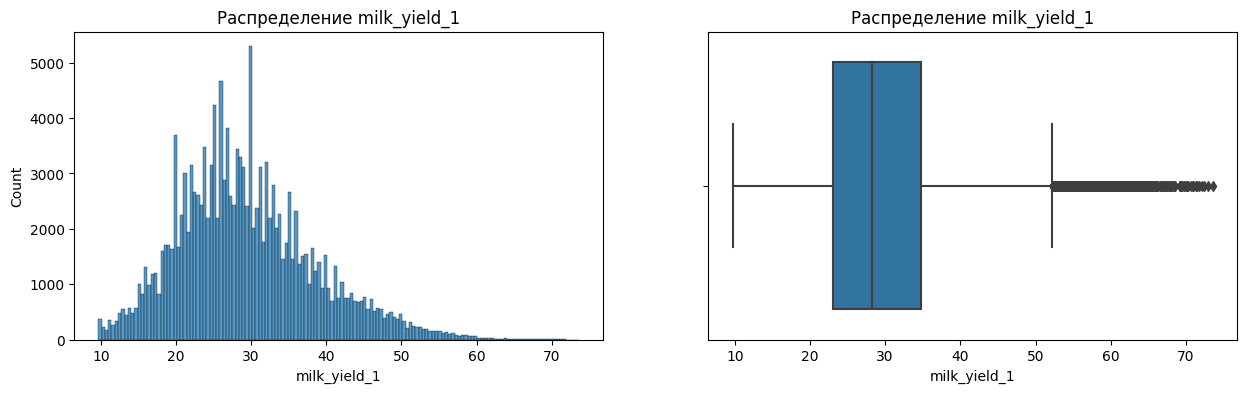

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_1', ax=axes[0]);
histplot.set_title('Распределение milk_yield_1');
boxplot = sns.boxplot(data=df, x='milk_yield_1', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_1');

---

### Распределение milk_yield_2

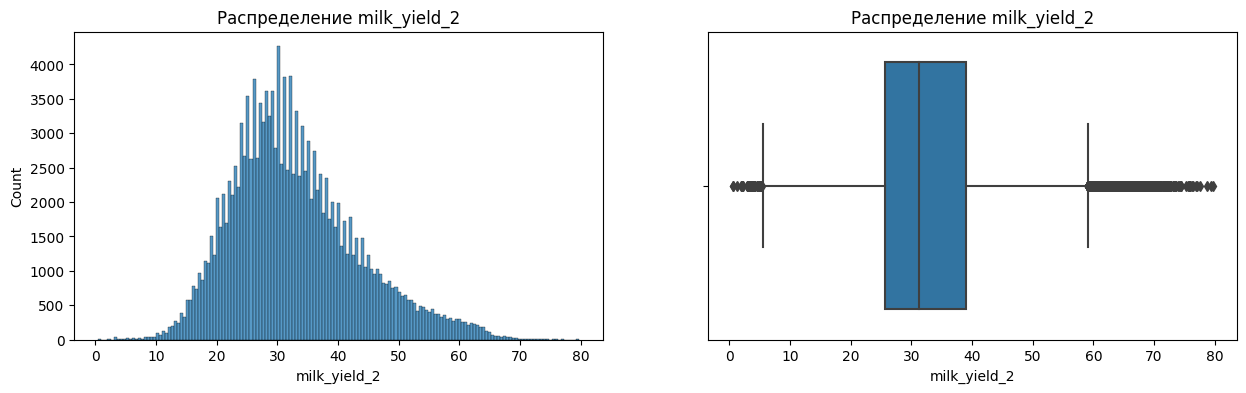

In [19]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_2', ax=axes[0]);
histplot.set_title('Распределение milk_yield_2');
boxplot = sns.boxplot(data=df, x='milk_yield_2', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_2');

In [20]:
# Вызываем функцию для очистки признака 'milk_yield_2' от выбросов в df
df = outliers_z_score(df, 'milk_yield_2', log_scale=True)

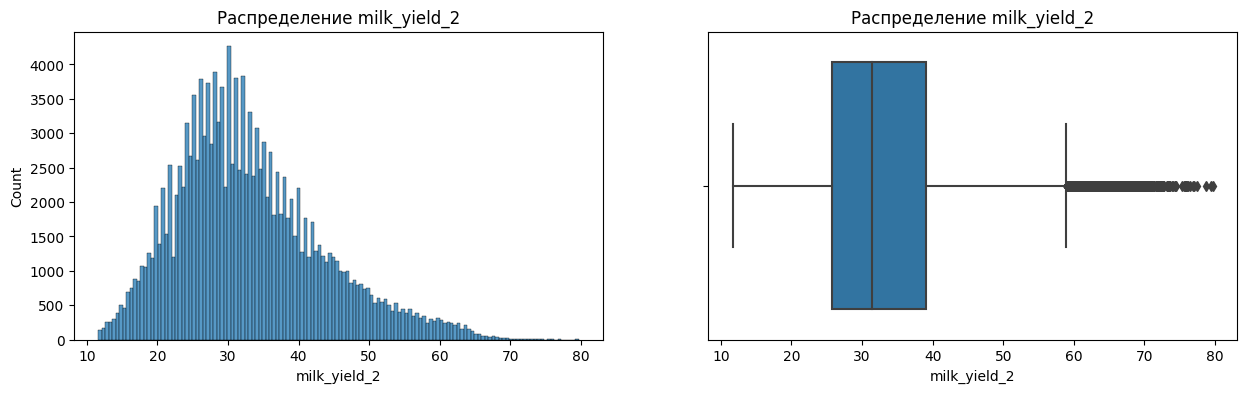

In [21]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_2', ax=axes[0]);
histplot.set_title('Распределение milk_yield_2');
boxplot = sns.boxplot(data=df, x='milk_yield_2', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_2');

---

### Распределение milk_yield_3

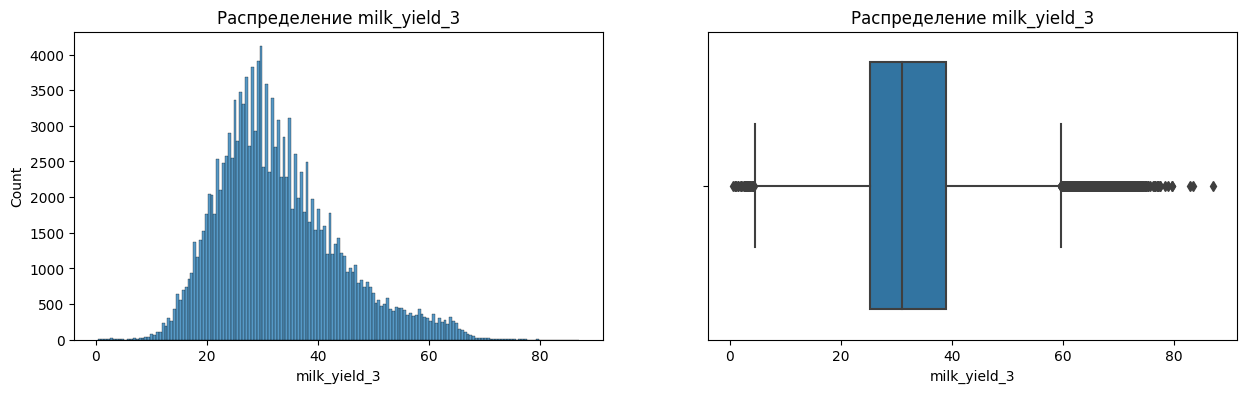

In [22]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_3', ax=axes[0]);
histplot.set_title('Распределение milk_yield_3');
boxplot = sns.boxplot(data=df, x='milk_yield_3', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_3');

In [23]:
# Вызываем функцию для очистки признака 'milk_yield_3' от выбросов в df
df = outliers_z_score(df, 'milk_yield_3', log_scale=True)

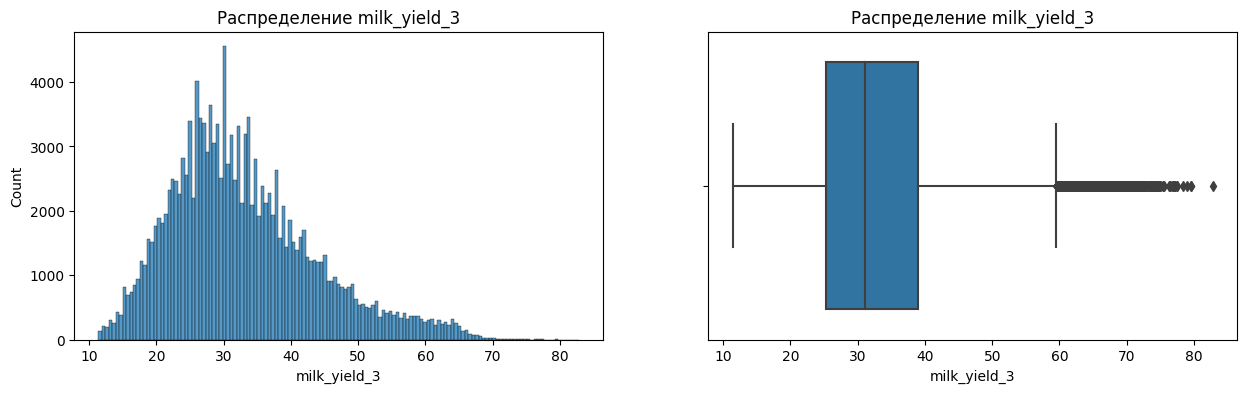

In [24]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_3', ax=axes[0]);
histplot.set_title('Распределение milk_yield_3');
boxplot = sns.boxplot(data=df, x='milk_yield_3', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_3');

---

### Распределение milk_yield_4

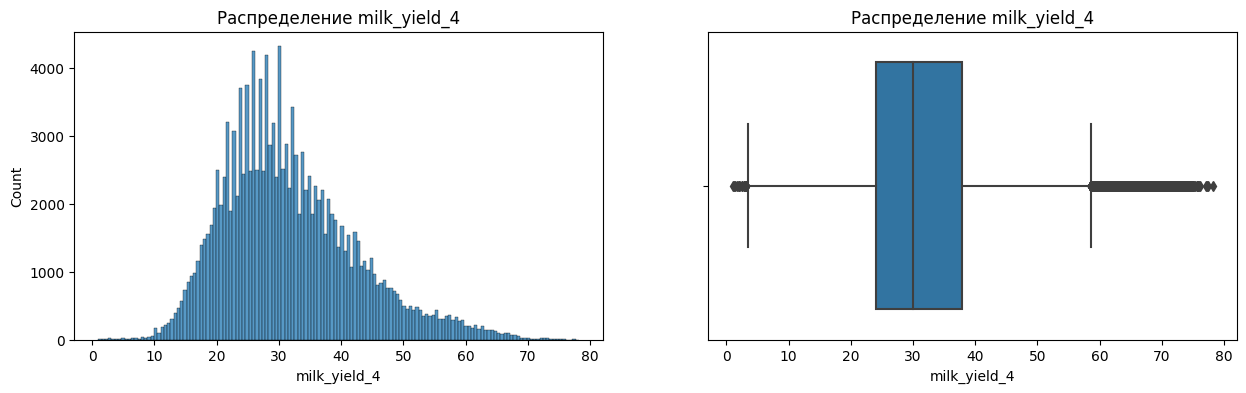

In [25]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_4', ax=axes[0]);
histplot.set_title('Распределение milk_yield_4');
boxplot = sns.boxplot(data=df, x='milk_yield_4', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_4');

In [26]:
# Вызываем функцию для очистки признака 'milk_yield_4' от выбросов в df
df = outliers_z_score(df, 'milk_yield_4', log_scale=True)

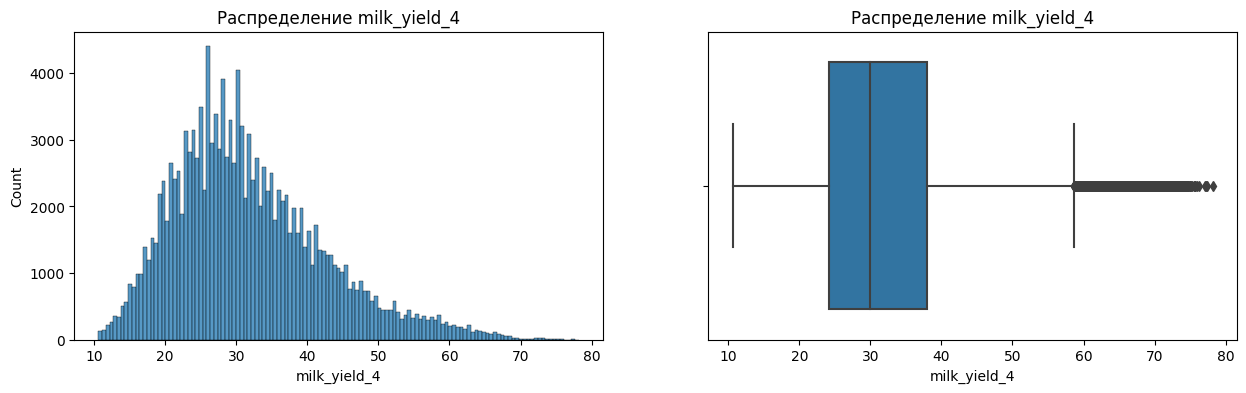

In [27]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_4', ax=axes[0]);
histplot.set_title('Распределение milk_yield_4');
boxplot = sns.boxplot(data=df, x='milk_yield_4', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_4');

---

### Распределение milk_yield_5

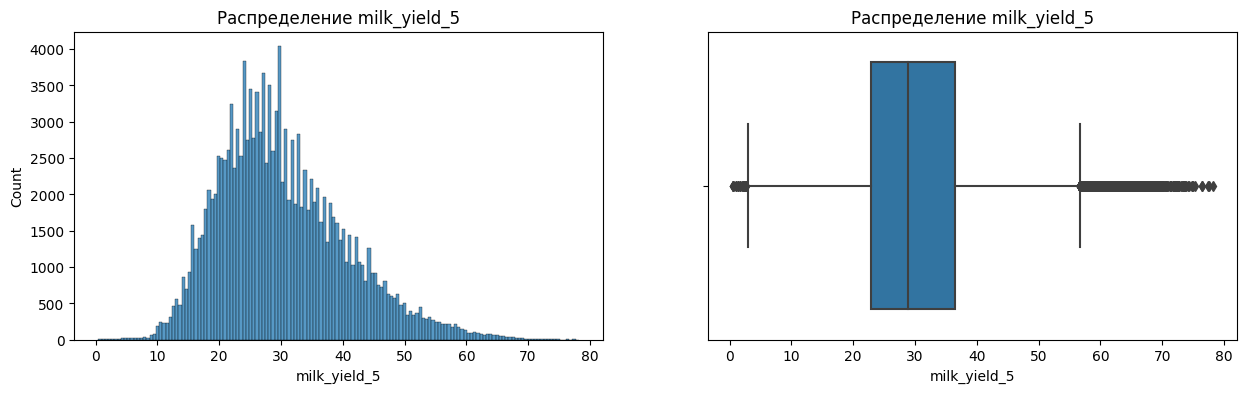

In [28]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_5', ax=axes[0]);
histplot.set_title('Распределение milk_yield_5');
boxplot = sns.boxplot(data=df, x='milk_yield_5', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_5');

In [29]:
# Вызываем функцию для очистки признака 'milk_yield_5' от выбросов в df
df = outliers_z_score(df, 'milk_yield_5', log_scale=True)

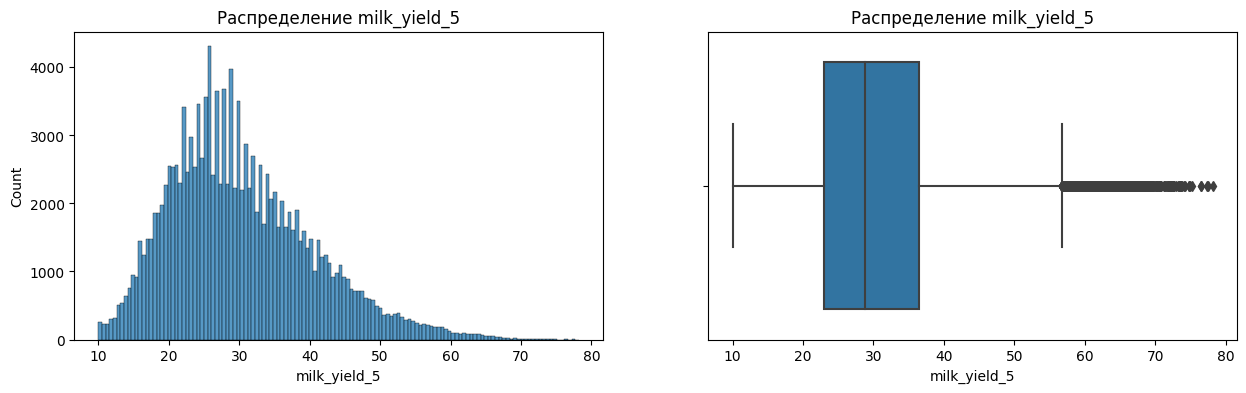

In [30]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_5', ax=axes[0]);
histplot.set_title('Распределение milk_yield_5');
boxplot = sns.boxplot(data=df, x='milk_yield_5', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_5');

---

### Распределение milk_yield_6

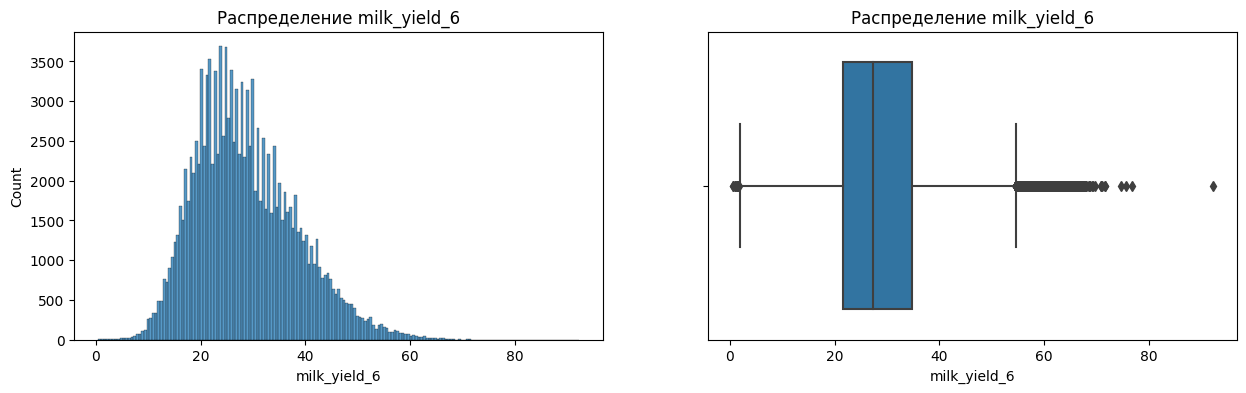

In [31]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_6', ax=axes[0]);
histplot.set_title('Распределение milk_yield_6');
boxplot = sns.boxplot(data=df, x='milk_yield_6', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_6');

In [32]:
# Вызываем функцию для очистки признака 'milk_yield_6' от выбросов в df
df = outliers_z_score(df, 'milk_yield_6', log_scale=True)

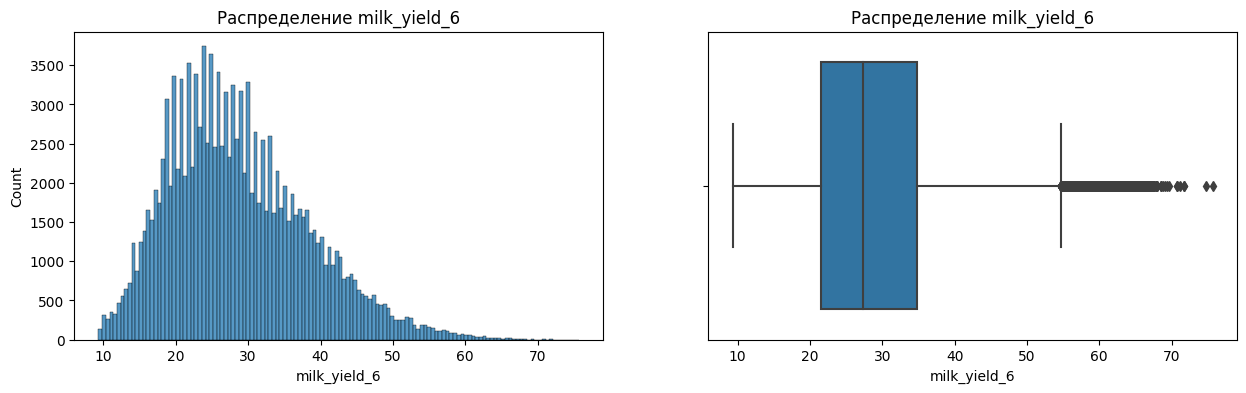

In [33]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_6', ax=axes[0]);
histplot.set_title('Распределение milk_yield_6');
boxplot = sns.boxplot(data=df, x='milk_yield_6', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_6');

---

### Распределение milk_yield_7

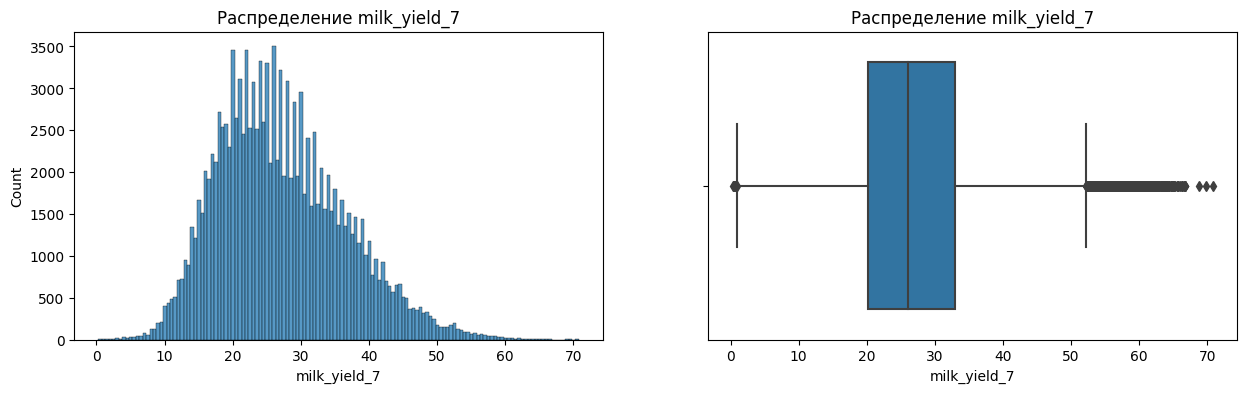

In [34]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_7', ax=axes[0]);
histplot.set_title('Распределение milk_yield_7');
boxplot = sns.boxplot(data=df, x='milk_yield_7', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_7');

In [35]:
# Вызываем функцию для очистки признака 'milk_yield_7' от выбросов в df
df = outliers_z_score(df, 'milk_yield_7', log_scale=True)

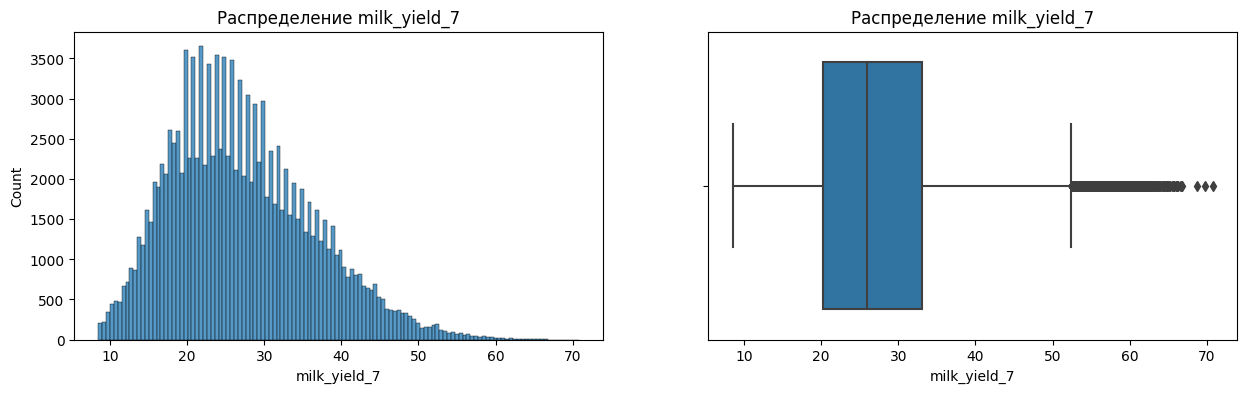

In [36]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_7', ax=axes[0]);
histplot.set_title('Распределение milk_yield_7');
boxplot = sns.boxplot(data=df, x='milk_yield_7', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_7');

---

### Распределение milk_yield_8

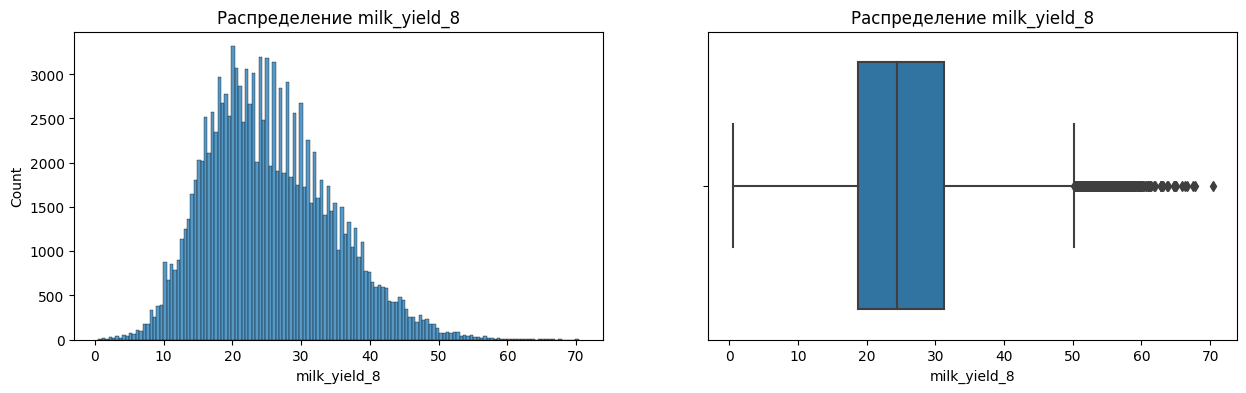

In [37]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_8', ax=axes[0]);
histplot.set_title('Распределение milk_yield_8');
boxplot = sns.boxplot(data=df, x='milk_yield_8', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_8');

In [38]:
# Вызываем функцию для очистки признака 'milk_yield_8' от выбросов в df
df = outliers_z_score(df, 'milk_yield_8', log_scale=True)

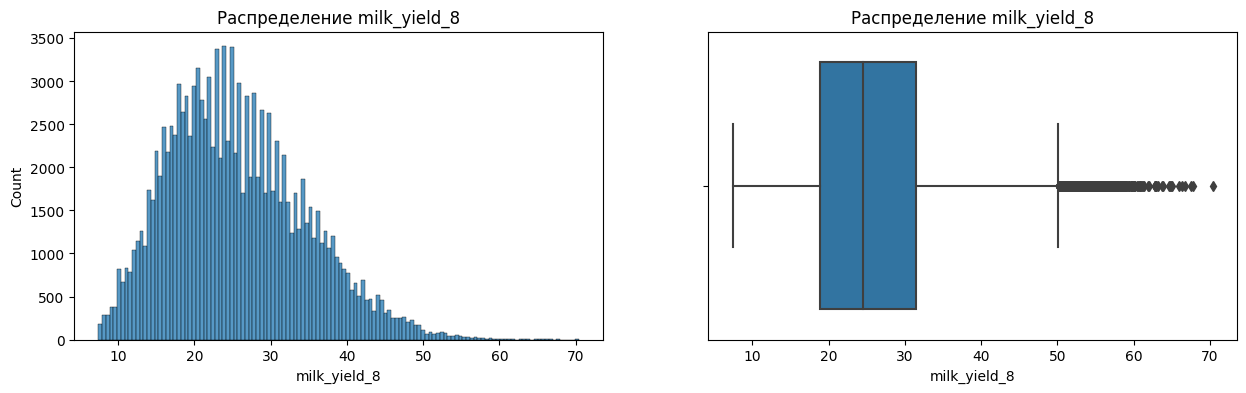

In [39]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_8', ax=axes[0]);
histplot.set_title('Распределение milk_yield_8');
boxplot = sns.boxplot(data=df, x='milk_yield_8', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_8');

---

### Распределение milk_yield_9

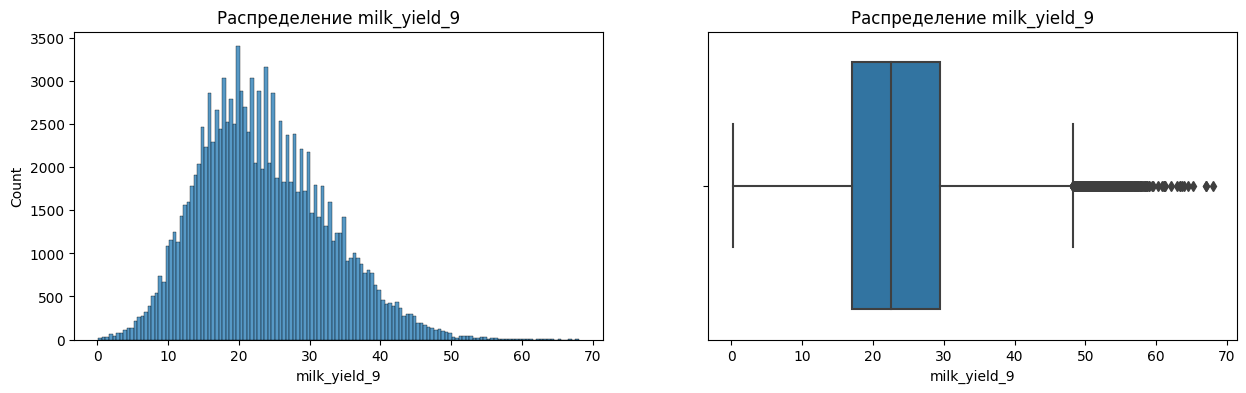

In [40]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_9', ax=axes[0]);
histplot.set_title('Распределение milk_yield_9');
boxplot = sns.boxplot(data=df, x='milk_yield_9', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_9');

In [41]:
# Вызываем функцию для очистки признака 'milk_yield_9' от выбросов в df
df = outliers_z_score(df, 'milk_yield_9', log_scale=True)

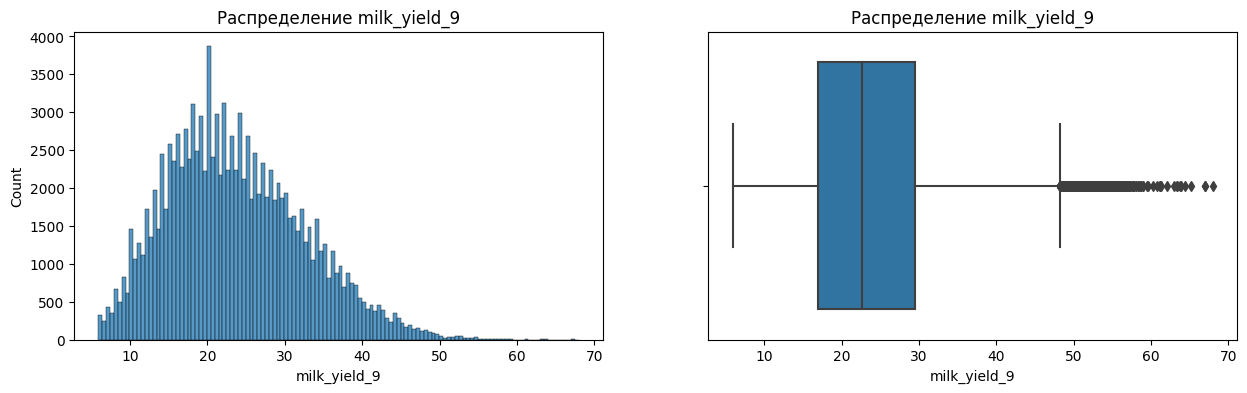

In [42]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_9', ax=axes[0]);
histplot.set_title('Распределение milk_yield_9');
boxplot = sns.boxplot(data=df, x='milk_yield_9', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_9');

---

### Распределение milk_yield_10

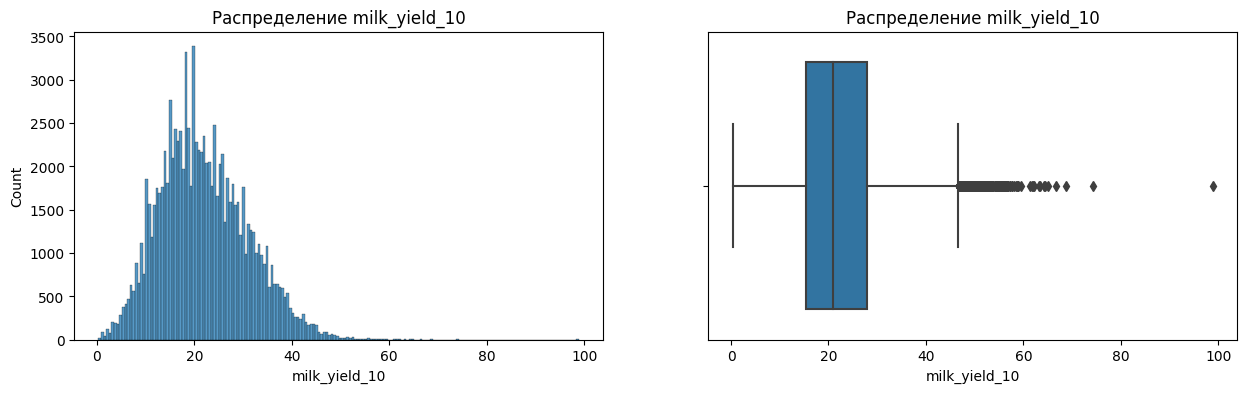

In [43]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_10', ax=axes[0]);
histplot.set_title('Распределение milk_yield_10');
boxplot = sns.boxplot(data=df, x='milk_yield_10', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_10');

In [44]:
# Вызываем функцию для очистки признака 'milk_yield_10' от выбросов в df
df = outliers_z_score(df, 'milk_yield_10', log_scale=True)

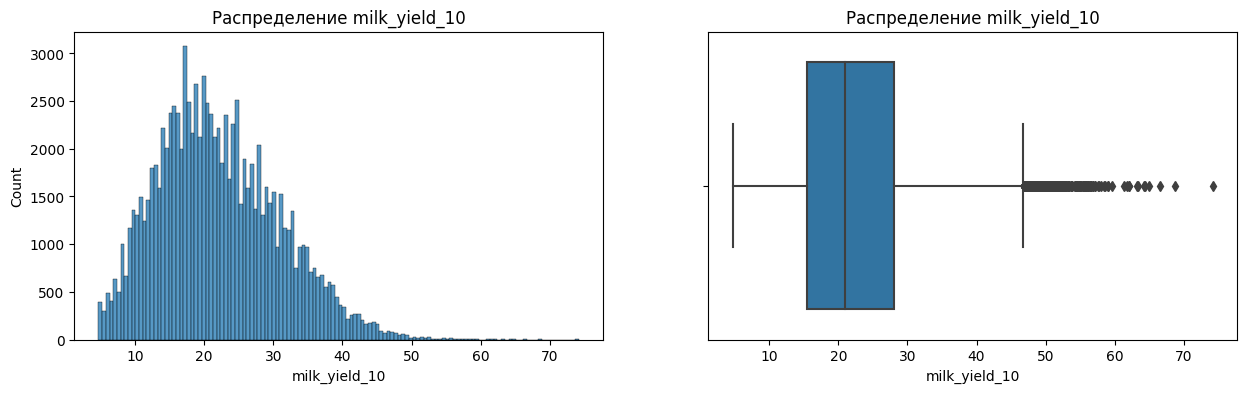

In [45]:
# Строю график, для визуализации информации 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='milk_yield_10', ax=axes[0]);
histplot.set_title('Распределение milk_yield_10');
boxplot = sns.boxplot(data=df, x='milk_yield_10', ax=axes[1]);
boxplot.set_title('Распределение milk_yield_10');

Общий вывод по всем milk_yield: у всех были выбросы и после обработки еще остались, но сами числы стали более похаидть на правду, а значит такие значения можно оставлять.

---

Текущем действием не только нормализовали значения, но и заполнили похожими числами пропуски 

Смотрим на наличие пропуск

In [46]:
# Количество пропусков в каждом столбце
missing_counts = df.isnull().sum()
print("Количество пропусков в каждом столбце:")
print(missing_counts)

Количество пропусков в каждом столбце:
animal_id           0
lactation           0
calving_date        0
farm                0
farmgroup           0
birth_date          0
milk_yield_1        0
milk_yield_2        0
milk_yield_3        0
milk_yield_4        0
milk_yield_5        0
milk_yield_6        0
milk_yield_7        0
milk_yield_8        0
milk_yield_9        0
milk_yield_10       0
mother_id        1148
father_id         160
dtype: int64


Отлично, пропуски имеют только родители 

---

Создал родословный признак 

Суть его заключается в том, чтобы увидеть поколение коров и зная, что некоторые коровы могут иметь несколько поколений, определить как это влияет на продукто который они выдают. 


In [47]:
# Функция для вычисл ения поколения животного
def calculate_generation(animal_id, generation_map, generation=1):
    if animal_id in generation_map:
        return generation_map[animal_id]
    mother_id = df.loc[df['animal_id'] == animal_id, 'mother_id'].values
    if len(mother_id) == 0 or pd.isna(mother_id[0]):
        generation_map[animal_id] = generation
        return generation
    mother_id = mother_id[0]
    gen = calculate_generation(mother_id, generation_map, generation + 1)
    generation_map[animal_id] = gen
    return gen

# Словарь для хранения поколений
generation_map = {}

# Вычисление поколений для всех животных
for animal_id in df['animal_id']:
    calculate_generation(animal_id, generation_map)

# Создание нового признака 'generation'
df['generation'] = df['animal_id'].map(generation_map)


Вывод: отлично теперь у меня есть новый признак generation, который даст мне возможность увидеть поколение коров и на основе поколения сделать предсказания по замерным дойкам 

In [48]:
df['calving_date'] = pd.to_datetime(df['calving_date'])
df['birth_date'] = pd.to_datetime(df['birth_date'])

# Создание новых признаков
df['calving_day'] = df['calving_date'].dt.day
df['calving_month'] = df['calving_date'].dt.month
df['calving_year'] = df['calving_date'].dt.year

df['birth_day'] = df['birth_date'].dt.day
df['birth_month'] = df['birth_date'].dt.month
df['birth_year'] = df['birth_date'].dt.year

# Определение сезона
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'autumn'

df['calving_season'] = df['calving_date'].apply(get_season)
df['birth_season'] = df['birth_date'].apply(get_season)

# Разница между датами в днях
df['days_difference'] = (df['calving_date'] - df['birth_date']).dt.days


Преобразвал дату и перевел ее во все различные знаечния, в поисках закономерностей. 

Далее я создал признак ферма - хозяйства. Я его еще не анализировал, но создал для того, чтобы понять имеет ли знаенчие ферма и хозяйства на коров.

In [49]:
# Создание нового признака как сочетание значений farm и farmgroup
df['farm_farmgroup'] = df.apply(lambda row: f"{row['farm']}-{row['farmgroup']}", axis=1)

Пытался заполнить пропуски как-то логически, но у меня не получилось, может в дальнейшем найду какую-нибудь логику. 

Пока ее нет, пустые значения заполнил 1 

In [50]:
# Замена NaN на 1 в столбцах mother_id и father_id
df['mother_id'].fillna('1', inplace=True)
df['father_id'].fillna('1', inplace=True)

---

In [51]:
df.head(3)

,animal_id,lactation,calving_date,farm,farmgroup,birth_date,milk_yield_1,milk_yield_2,milk_yield_3,milk_yield_4,...,calving_day,calving_month,calving_year,birth_day,birth_month,birth_year,calving_season,birth_season,days_difference,farm_farmgroup
1,ID_0000732194,1,2013-05-01,2104,4463,2011-05-19,16.7,15.9,14.4,20.4,...,1,5,2013,19,5,2011,Spring,Spring,713,2104-4463
2,ID_0000732195,1,2013-05-17,2104,4463,2011-06-01,15.8,14.4,19.3,23.1,...,17,5,2013,1,6,2011,Spring,Summer,716,2104-4463
3,ID_0000732195,2,2014-06-16,2104,4463,2011-06-01,43.7,39.9,39.2,33.2,...,16,6,2014,1,6,2011,Summer,Summer,1111,2104-4463


In [54]:
date_columns = ['calving_date', 'birth_date']  
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col]).view('int64') // 10**9  # Преобразование в Unix timestamp


In [56]:
encoder = LabelEncoder()
for col in ['animal_id', 'farm', 'mother_id', 'father_id', 'calving_season', 'birth_season', 'farm_farmgroup']:
    if col in df.columns:
        df[col] = encoder.fit_transform(df[col])


In [57]:
df = df.drop(date_columns, axis=1)


In [63]:
target_columns = ['milk_yield_3', 'milk_yield_4', 'milk_yield_5', 'milk_yield_6', 'milk_yield_7', 'milk_yield_8', 'milk_yield_9', 'milk_yield_10']

# Разделение на признаки (X) и целевые переменные (y)
X = df.drop(target_columns, axis=1)
y = df[target_columns]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
# Обучение модели и предсказание пропущенных значений
model = RandomForestRegressor()
model.fit(X_train, y_train)
predicted_values = model.predict(X_test)


In [65]:
# Вычислим RMSE для каждого столбца и среднее RMSE по всем столбцам
rmse_scores = np.sqrt(mean_squared_error(y_test, predicted_values, multioutput='raw_values'))
mean_rmse = np.mean(rmse_scores)

# Форматируем вывод с двумя знаками после запятой
rmse_scores_str = ", ".join([f"{score:.2f}" for score in rmse_scores])
mean_rmse_str = f"{mean_rmse:.2f}"

print(f"RMSE по контрольным дойкам 3-10: {rmse_scores_str}")
print(f"Среднее RMSE: {mean_rmse_str}")


RMSE по контрольным дойкам 3-10: 4.69, 5.30, 5.44, 5.35, 5.33, 5.35, 5.54, 6.07
Среднее RMSE: 5.39


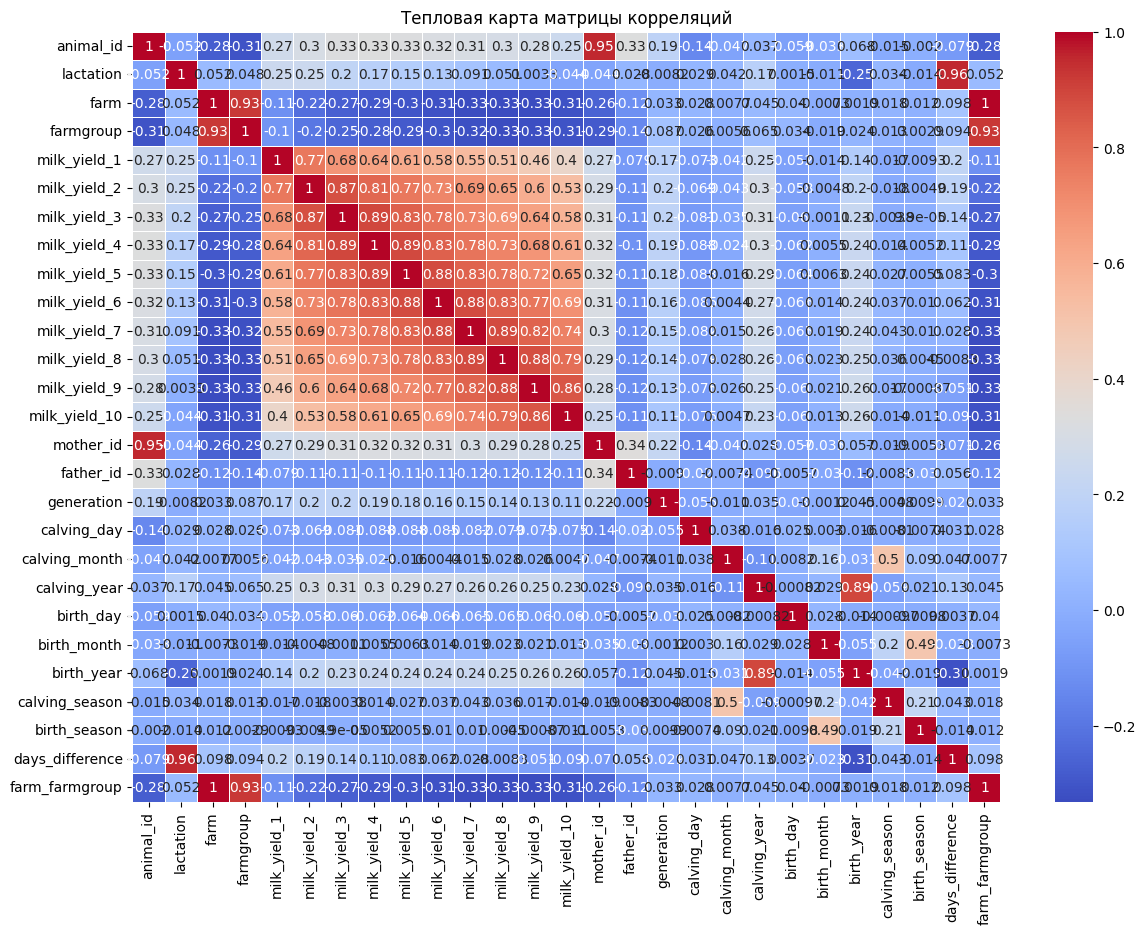

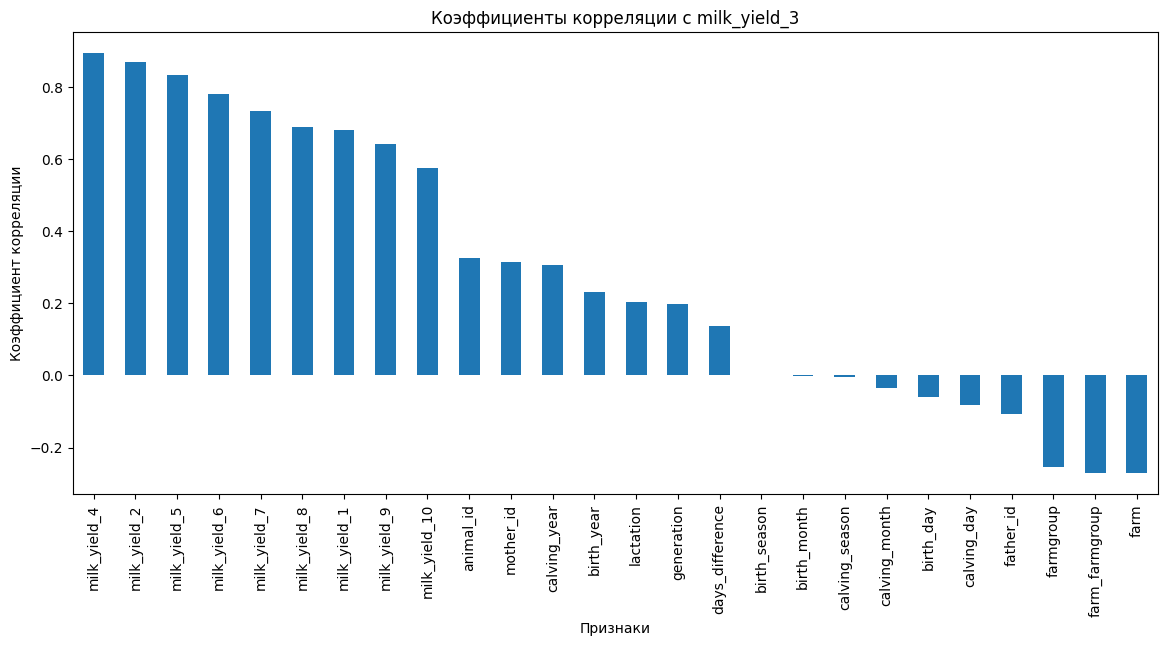

Пары признаков с сильной корреляцией (>= 0.9 или <= -0.9):
          Признак 1        Признак 2  Корреляция
1         animal_id        mother_id    0.953667
3         lactation  days_difference    0.956585
5              farm        farmgroup    0.925417
6              farm   farm_farmgroup    1.000000
7         farmgroup             farm    0.925417
9         farmgroup   farm_farmgroup    0.925417
20        mother_id        animal_id    0.953667
32  days_difference        lactation    0.956585
34   farm_farmgroup             farm    1.000000
35   farm_farmgroup        farmgroup    0.925417


In [68]:

# Разделение данных на обучающую и тестовую выборки
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Вычисление матрицы корреляций для обучающей выборки
corr_matrix = train.corr()

# Построение тепловой карты для матрицы корреляций
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Тепловая карта матрицы корреляций')
plt.show()

# Вычисление ранжированных коэффициентов корреляции для одной из целевых переменных
# В данном случае используем 'milk_yield_3'
target_variable = 'milk_yield_3'
corr_target = corr_matrix[target_variable].sort_values(ascending=False)

# Построение столбчатой диаграммы для ранжированных коэффициентов корреляции
plt.figure(figsize=(14, 6))
corr_target.drop(target_variable).plot(kind='bar')
plt.title(f'Коэффициенты корреляции с {target_variable}')
plt.ylabel('Коэффициент корреляции')
plt.xlabel('Признаки')
plt.show()

# Поиск признаков с корреляцией >= 0.9 или <= -0.9
strong_corr = corr_matrix[(corr_matrix >= 0.9) | (corr_matrix <= -0.9)]
strong_corr_pairs = strong_corr.stack().reset_index()
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs['level_0'] != strong_corr_pairs['level_1']]
strong_corr_pairs.columns = ['Признак 1', 'Признак 2', 'Корреляция']

print("Пары признаков с сильной корреляцией (>= 0.9 или <= -0.9):")
print(strong_corr_pairs)


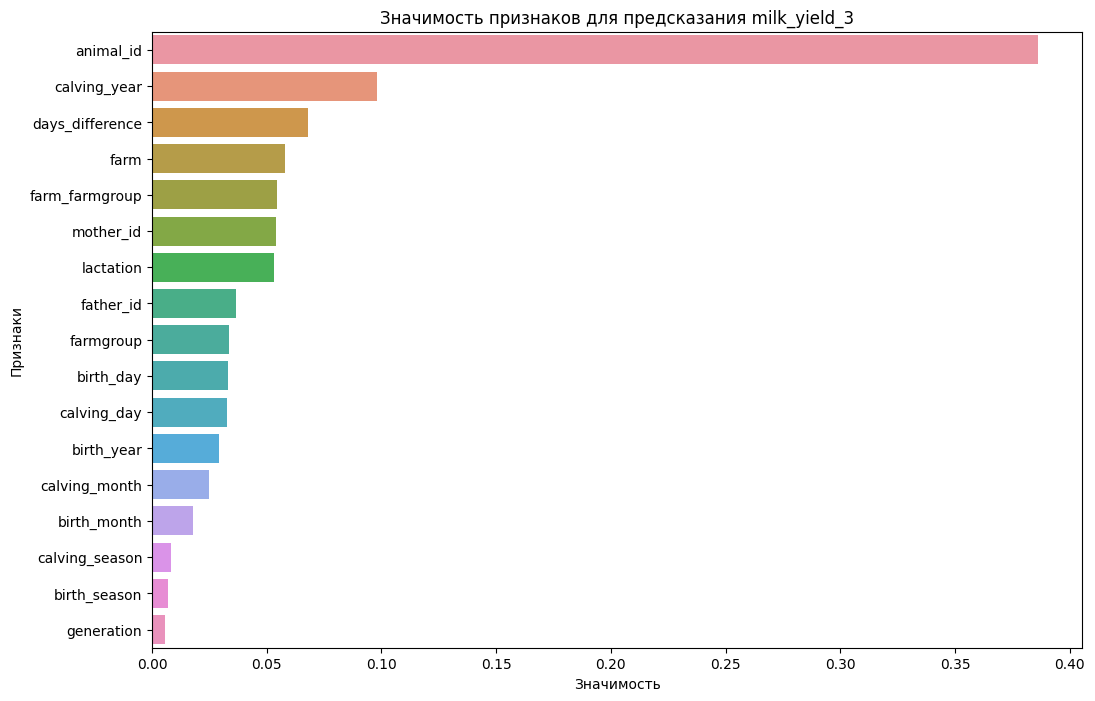

In [69]:

# Разделение данных на обучающую и тестовую выборки
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Выборка для обучения модели
X_train = train.drop(['milk_yield_1','milk_yield_2','milk_yield_3', 'milk_yield_4', 'milk_yield_5', 'milk_yield_6', 'milk_yield_7', 'milk_yield_8', 'milk_yield_9', 'milk_yield_10'], axis=1)
y_train = train['milk_yield_3']  # Мы будем использовать только одну целевую переменную для примера

# Обучение модели случайного леса
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Получение значимости признаков
feature_importances = model.feature_importances_
features = X_train.columns

# Создание DataFrame для удобства визуализации
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Построение столбчатой диаграммы значимости признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Значимость признаков для предсказания milk_yield_3')
plt.xlabel('Значимость')
plt.ylabel('Признаки')
plt.show()


Вывод: проделана большая работа и можно с увереностью ответить какие признаки влияют на количество получаемой меры в замер контрольной дойки. 

In [76]:
# Пример получения RMSE и стандартного отклонения
rmse_scores_str = [4.69, 5.30, 5.44, 5.35, 5.33, 5.35, 5.54, 6.07]
mean_rmse = np.mean(rmse_scores_str)
std_dev = y_train.std()

print(f"Среднее значение RMSE: {mean_rmse}")
print(f"Стандартное отклонение RMSE: {std_dev}")


Среднее значение RMSE: 5.38375
Стандартное отклонение RMSE: 11.1167145843457


Высокое стандартное отклонение RMSE указывает на нестабильность предсказаний модели, что является серьезным сигналом о необходимости дальнейшего улучшения модели. 